In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [87]:
df = pd.read_excel('assets/data.xlsx')
df.head()

,Unnamed: 0,190,191,192,193,194,195,196,197,198,...,792,793,794,795,796,797,798,799,800,label
0,1,0.6230,0.6186,0.6125,0.6332,0.6381,0.6454,0.6492,0.6284,0.6537,...,0.0276,0.0276,0.0274,0.0272,0.0274,0.0276,0.0275,0.0275,0.0275,BG01
1,2,0.7271,0.7496,0.7629,0.7577,0.7800,0.7863,0.7664,0.7712,0.8128,...,0.0291,0.0294,0.0291,0.0287,0.0285,0.0286,0.0287,0.0285,0.0284,BG02
2,3,0.7271,0.7010,0.6892,0.7180,0.7502,0.7638,0.7574,0.7597,0.7649,...,0.0256,0.0256,0.0255,0.0255,0.0256,0.0255,0.0255,0.0258,0.0262,CP29.9
3,4,0.6281,0.6499,0.6559,0.6435,0.6595,0.6586,0.6535,0.6747,0.6989,...,-0.0033,-0.0033,-0.0032,-0.0033,-0.0035,-0.0032,-0.0031,-0.0034,-0.0032,CV
4,5,0.3028,0.2996,0.2870,0.2860,0.2867,0.2809,0.2994,0.3076,0.3159,...,0.0260,0.0263,0.0261,0.0257,0.0257,0.0261,0.0261,0.0259,0.0260,FANTA


In [88]:
df = df.iloc[:, 1:]
df.head()

,190,191,192,193,194,195,196,197,198,199,...,792,793,794,795,796,797,798,799,800,label
0,0.6230,0.6186,0.6125,0.6332,0.6381,0.6454,0.6492,0.6284,0.6537,0.6814,...,0.0276,0.0276,0.0274,0.0272,0.0274,0.0276,0.0275,0.0275,0.0275,BG01
1,0.7271,0.7496,0.7629,0.7577,0.7800,0.7863,0.7664,0.7712,0.8128,0.8295,...,0.0291,0.0294,0.0291,0.0287,0.0285,0.0286,0.0287,0.0285,0.0284,BG02
2,0.7271,0.7010,0.6892,0.7180,0.7502,0.7638,0.7574,0.7597,0.7649,0.7644,...,0.0256,0.0256,0.0255,0.0255,0.0256,0.0255,0.0255,0.0258,0.0262,CP29.9
3,0.6281,0.6499,0.6559,0.6435,0.6595,0.6586,0.6535,0.6747,0.6989,0.7004,...,-0.0033,-0.0033,-0.0032,-0.0033,-0.0035,-0.0032,-0.0031,-0.0034,-0.0032,CV
4,0.3028,0.2996,0.2870,0.2860,0.2867,0.2809,0.2994,0.3076,0.3159,0.3222,...,0.0260,0.0263,0.0261,0.0257,0.0257,0.0261,0.0261,0.0259,0.0260,FANTA


In [89]:
y = df.iloc[:,-1]
X = df.drop("label", axis=1)
X.head()

,190,191,192,193,194,195,196,197,198,199,...,791,792,793,794,795,796,797,798,799,800
0,0.6230,0.6186,0.6125,0.6332,0.6381,0.6454,0.6492,0.6284,0.6537,0.6814,...,0.0272,0.0276,0.0276,0.0274,0.0272,0.0274,0.0276,0.0275,0.0275,0.0275
1,0.7271,0.7496,0.7629,0.7577,0.7800,0.7863,0.7664,0.7712,0.8128,0.8295,...,0.0288,0.0291,0.0294,0.0291,0.0287,0.0285,0.0286,0.0287,0.0285,0.0284
2,0.7271,0.7010,0.6892,0.7180,0.7502,0.7638,0.7574,0.7597,0.7649,0.7644,...,0.0253,0.0256,0.0256,0.0255,0.0255,0.0256,0.0255,0.0255,0.0258,0.0262
3,0.6281,0.6499,0.6559,0.6435,0.6595,0.6586,0.6535,0.6747,0.6989,0.7004,...,-0.0034,-0.0033,-0.0033,-0.0032,-0.0033,-0.0035,-0.0032,-0.0031,-0.0034,-0.0032
4,0.3028,0.2996,0.2870,0.2860,0.2867,0.2809,0.2994,0.3076,0.3159,0.3222,...,0.0258,0.0260,0.0263,0.0261,0.0257,0.0257,0.0261,0.0261,0.0259,0.0260


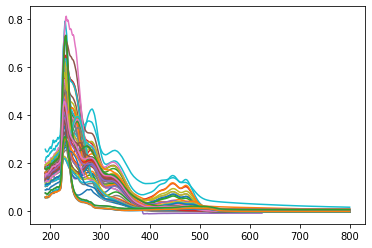

In [90]:
plt.plot(X.T / 4)

In [91]:
y = np.array(y)
y

array(['BG01', 'BG02', 'CP29.9', 'CV', 'FANTA', 'GL01', 'GL02', 'GL03',
       'GL04', 'HamY01', 'HamY02', 'HamY03', 'HamY04', 'HamY05', 'HamY06',
       'HB02', 'HD01', 'HD02', 'HG03', 'HG01', 'HG02', 'HG04', 'HG05',
       'HT01', 'HY01', 'HY02', 'LC', 'QN01', 'QN02', 'TH01', 'Sundril',
       'Tepi', 'Twister', 'Vfresh', 'VL', 'NC 01', 'NC02', 'NC 03',
       'NC 04', 'NC 06', 'THTM 01', 'THTM 02', 'THTM 03', 'THTM 04',
       'THTM 05', 'THTM 06', 'TM 02', 'TM 03', 'TM 04', 'TM 05', 'TM 06',
       'VFRESH 01', 'VFRESH 02', 'VFRESH 03', 'VFRESH 04', 'VFRESH 05',
       'VFRESH 06', 'FANTA 01', 'FANTA 02', 'FANTA 03', 'FANTA 04',
       'FANTA 05', 'FANTA 06'], dtype=object)

In [92]:
encode_y = []
commercial = ['fanta', 'sundril', 'tepi', 'twister', 'vfresh', 'vl', 'thtm', 'nc', 'tm']
for i in y:
    contains_a = any(element in i.lower() for element in commercial)
    if contains_a: encode_y.append(0)
    else: encode_y.append(1)
encode_y=np.array(encode_y)
encode_y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, encode_y, test_size=0.2, stratify=encode_y)

In [94]:
y_test

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [96]:
n_components = 5
pca = PCA(n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

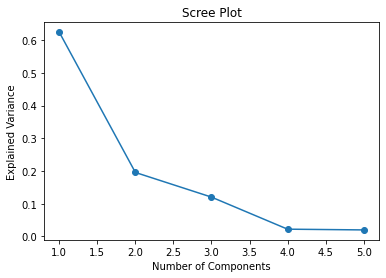

In [97]:
explained_variance = pca.explained_variance_ratio_
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

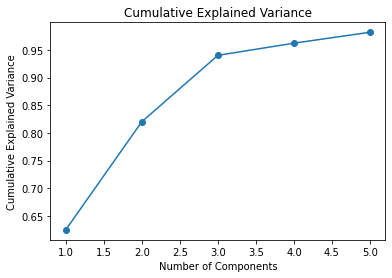

In [98]:
cumulative_explained_variance = np.cumsum(explained_variance)
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

In [99]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(X_train_pca, y_train)
LR_pred = LR.predict(X_test_pca)
pred_df = pd.DataFrame(LR_pred, columns=["Predict"])
test_df = pd.DataFrame(y_test, columns=["Test"])
final_df = pd.concat([pred_df, test_df], axis=1)
final_df

,Predict,Test
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,0
6,0,0
7,0,1
8,1,0
9,0,0


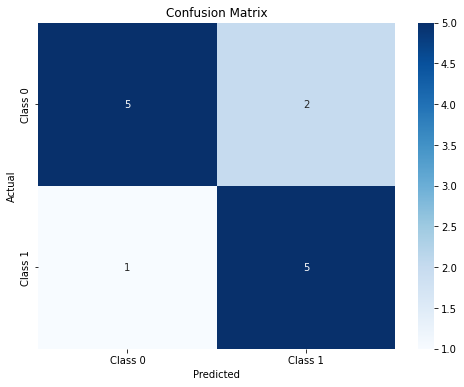

In [100]:

conf_matrix = confusion_matrix(y_test, LR_pred)

# Define class labels if applicable
class_labels = ["Class 0", "Class 1"]

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [101]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, LR_pred)
recall = recall_score(y_test, LR_pred)
accuracy = accuracy_score(y_test, LR_pred)
f1 = f1_score(y_test, LR_pred)

print("Accuracy: ", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy:  0.7692307692307693
Precision: 0.7142857142857143
Recall: 0.8333333333333334
F1-score: 0.7692307692307692


ANN

In [102]:


model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=(n_components,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification, so use sigmoid activation
])
optimizer=SGD(lr=1e-3, momentum=0.9, decay=1e-2/500)
# Compile the model
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',  # For binary classification
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pca, y_train, epochs=500, batch_size=20, validation_split=0.1)

# Print loss and accuracy history
# print("Training loss history:", history.history['loss'])
# print("Training accuracy history:", history.history['accuracy'])
# print("Validation loss history:", history.history['val_loss'])
# print("Validation accuracy history:", history.history['val_accuracy'])



Epoch 1/500


c:\Users\84866\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


3/3 [==============================] - 0s 47ms/step - loss: 2.0500 - accuracy: 0.4667 - val_loss: 1.4494 - val_accuracy: 0.6000
Epoch 2/500
3/3 [==============================] - 0s 11ms/step - loss: 1.6184 - accuracy: 0.4889 - val_loss: 1.8897 - val_accuracy: 0.6000
Epoch 3/500
3/3 [==============================] - 0s 10ms/step - loss: 1.4096 - accuracy: 0.5111 - val_loss: 2.4577 - val_accuracy: 0.4000
Epoch 4/500
3/3 [==============================] - 0s 10ms/step - loss: 1.4036 - accuracy: 0.5333 - val_loss: 2.5594 - val_accuracy: 0.4000
Epoch 5/500
3/3 [==============================] - 0s 9ms/step - loss: 1.3830 - accuracy: 0.5333 - val_loss: 2.4642 - val_accuracy: 0.4000
Epoch 6/500
3/3 [==============================] - 0s 12ms/step - loss: 1.3191 - accuracy: 0.5333 - val_loss: 2.2611 - val_accuracy: 0.6000
Epoch 7/500
3/3 [==============================] - 0s 10ms/step - loss: 1.2317 - accuracy: 0.5556 - val_loss: 1.9416 - val_accuracy: 0.6000
Epoch 8/500
3/3 [================

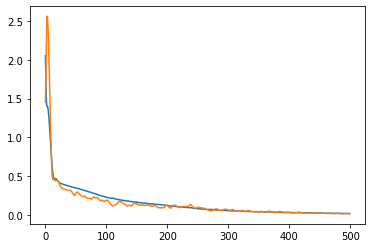

In [103]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

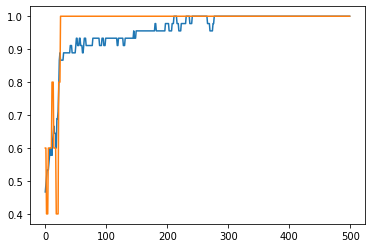

In [104]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [105]:
y_pred = model.predict(X_test_pca)
y_pred[y_pred > 0.5] = 1 
y_pred[y_pred <= 0.5] = 0 

pred_df = pd.DataFrame(y_pred, columns=["Predict"])
test_df = pd.DataFrame(y_test, columns=["Test"])
final_df = pd.concat([pred_df, test_df], axis=1)
final_df

1/1 [==============================] - 0s 37ms/step


,Predict,Test
0,1.0,1
1,1.0,1
2,1.0,1
3,1.0,1
4,1.0,1
5,0.0,0
6,0.0,0
7,1.0,1
8,1.0,0
9,0.0,0


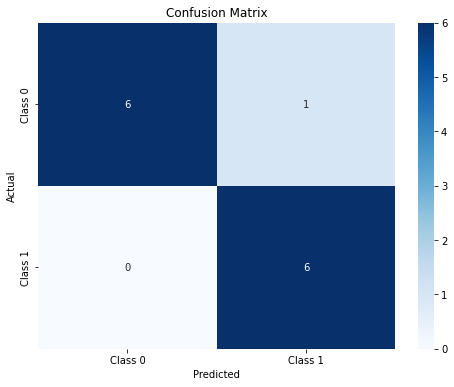

In [106]:

conf_matrix = confusion_matrix(y_test, y_pred)

# Define class labels if applicable
class_labels = ["Class 0", "Class 1"]

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [107]:

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy:  0.9230769230769231
Precision: 0.8571428571428571
Recall: 1.0
F1-score: 0.923076923076923
